<h1>LAB 1</h1>

<h2>IMPORTING LIBRARIES</h2>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

<h2>LOADING DATA</h2>

In [ ]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

<h2>DISPLAYING THE INFO OF ALL THE COLUMNS OF THE DATAFRAME</h2>

In [ ]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

<h2>DATAFRAME SHAPE</h2>

In [ ]:
customer_df.shape

print ('Dataframe has 9134 rows and 24 columns')

Dataframe has 9134 rows and 24 columns


In [ ]:
customer_df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<h2>COLUMNS TO SNAKE CASE</h2>

In [ ]:
def snake_case_(dataframe):

    snake_columns = list()

    for column in dataframe.columns:
        column = column.replace(' ', '_')
        column = column.lower()
        snake_columns.append(column)

    dataframe.columns = snake_columns

    return dataframe

customer_df = snake_case_(customer_df)



#alternative with no function
#customer_df.columns = customer_df.columns.str.lower()

#customer_df.columns  = customer_df.columns.str.replace(' ','_')


<h2>CONVERTING THE EFFECTIVE TO DATE COLUMN </h2>

In [ ]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

<h2>NAN VALUES</h2>

In [ ]:

print(customer_df.isna().sum())
print('There are no null values in the dataframe')

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64
There are no null values in the dataframe


<h2>NUMERICAL, CATEGORICAL AND DISCRETE</h2>

In [ ]:
def discr_cont(df):
    cat = df.select_dtypes(include=np.object)
    continuous = []
    discrete = []
    
    for i in df.select_dtypes(include=np.number):
        if len(df[i].unique()) < 10:
            discrete.append(i)
        else:
            continuous.append(i)
    return cat, continuous, discrete

cat, continuous, discrete = discr_cont(customer_df)

continuous_df = pd.DataFrame(data=customer_df,columns=continuous)
discrete_df = pd.DataFrame(data=customer_df,columns=discrete)
categoricals_df = cat



<h2>SPLITTING THE POLICY TYPE COLUMN IN TWO COLUMNS</h2>

In [ ]:
policy_category = list()
policy_code = list()

for policy in categoricals_df['policy'].values:
    policy_values = policy.split()
    policy_category.append(policy_values[0])
    policy_code.append(policy_values[1])

categoricals_df['policy_category'] = policy_category
categoricals_df['policy_code'] = policy_code
categoricals_df  = categoricals_df.drop('policy', axis = 1)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


<h2>CUSTOMER ID CONCLUSION</h2>

<h3>Check if there are duplicates customer id to indentify it better </h3>

In [ ]:

customer_df['customer'].duplicated().sum()

0

<h3>Customer ID is a columns that identifies a unique customer, then a unique sale. Better to store it for ow in a variable and then use it as identifier after preprocessing </h3>

-----------------------------------------------------------------------------------------------

<h1>LAB 2</h1>

<h2>CONCATING THE CONTINUOUS AND DISCRETE DATA AND SHOWING A CORRELATION MATRIX</h2>

In [ ]:
continuous_discrete_df= pd.concat([continuous_df , discrete_df], axis = 1)

<h2>CORRELATION MATRIX - CONTINUOUS AND DISCRETE VALUES</h2>

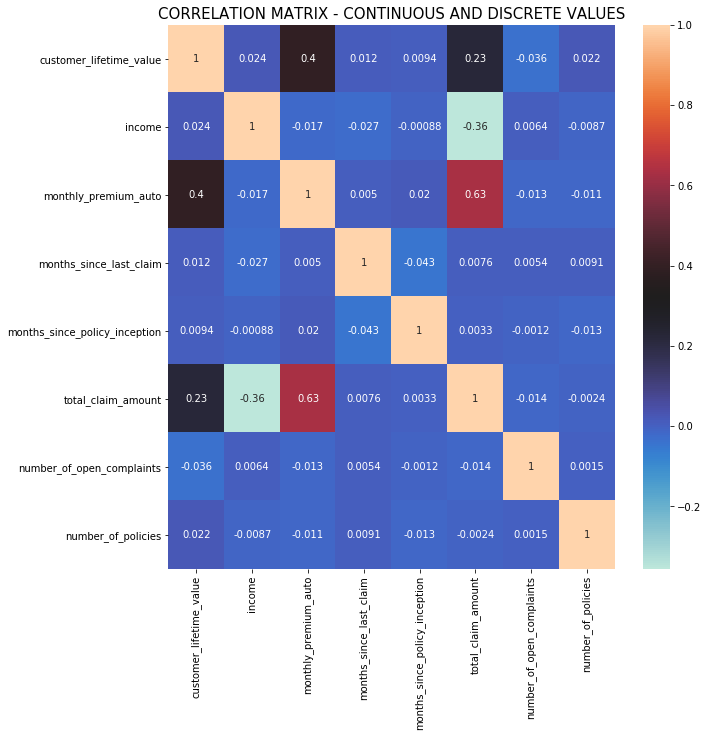

In [ ]:
fig = plt.figure(figsize = (10, 10))
sns.heatmap(continuous_discrete_df.corr(), annot = True, cmap = 'icefire')
plt.title('CORRELATION MATRIX - CONTINUOUS AND DISCRETE VALUES', fontsize = 15)
plt.show()

<h2>PLOTTING CONTINUOUS FEATURES</h2>

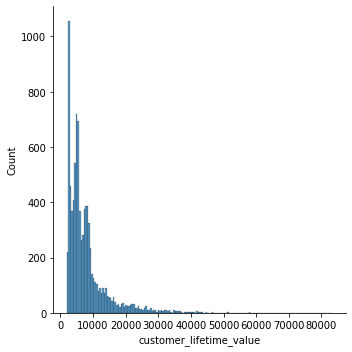

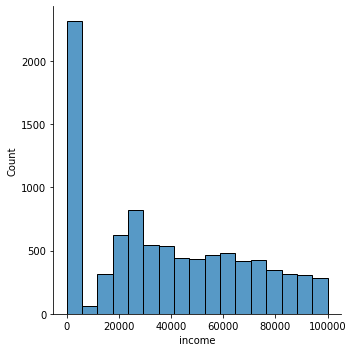

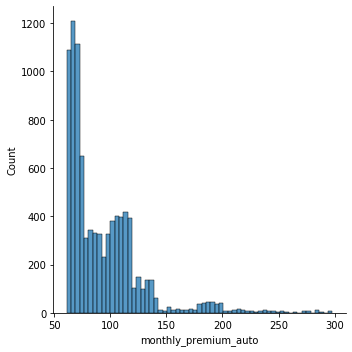

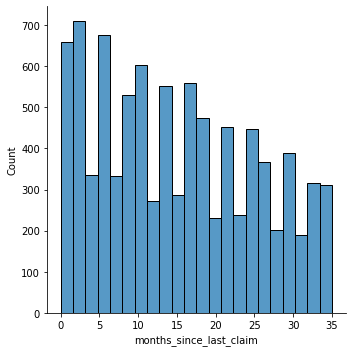

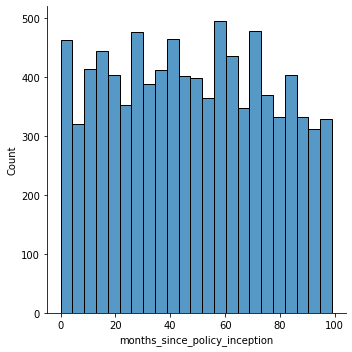

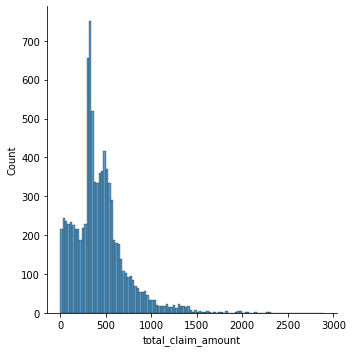

In [ ]:
!pip install seaborn==0.11.0

def plot_cont(df):
    for i in df:
        sns.displot(x=i, data=df)
        plt.show()
    return None

plot_cont(continuous_df)

In [ ]:
#count of income values

customer_df['income'].value_counts()

0        2317
95697      12
40864       7
24910       7
25965       7
         ... 
26952       1
84300       1
22862       1
20815       1
57240       1
Name: income, Length: 5694, dtype: int64

<h3> We have some features that are heavily skewed on the right , see Total Claim Amount, Monthly Premium Auto and Customer LifeTime Value, while Income as a huge number of values  = 0 </h3>



<h2>PLOTTING DISCRETE FEATURES</h2>

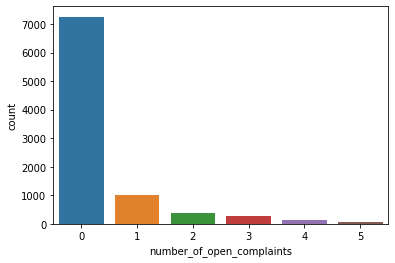

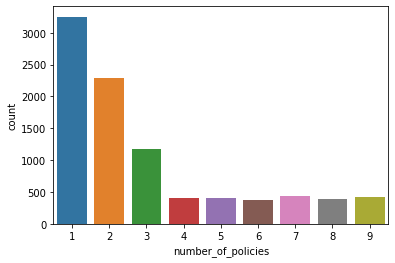

In [ ]:
def plot_disc(df):
    for i in df:
        sns.countplot(x=i, data=df)
        plt.show()
    return None

plot_disc(discrete_df)

<h3> Most of the customers have 0 complaints , it might be a sign of good quality company cuatomer care, or just that they dont have so many in general</h3>



<h2>PLOTTING THE NUMERICAL FEATURES</h2>

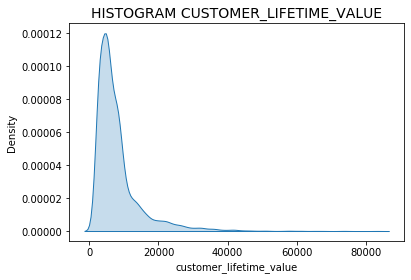

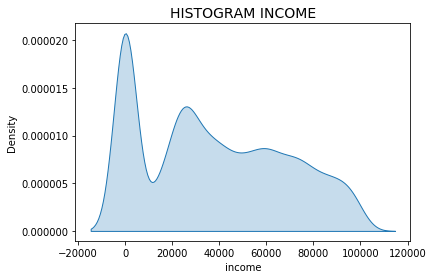

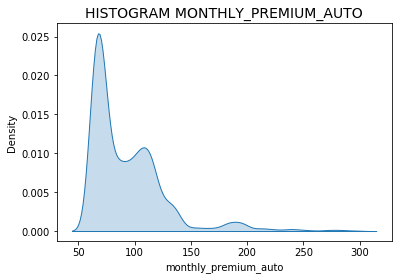

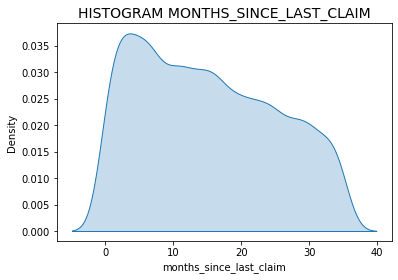

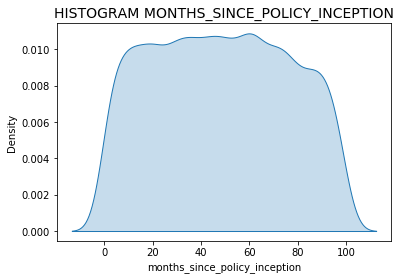

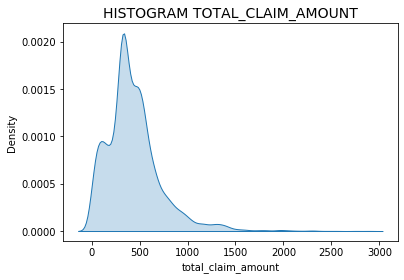

In [ ]:
def histograms(dataframe):

    for column in dataframe.columns:
        fig = plt.figure(figsize = (6, 4))
        sns.kdeplot(x = column, data = dataframe, palette = 'icefire', fill = True)
        plt.title(f'HISTOGRAM {column.upper()}',  fontsize = 14)
        plt.show()

    return None

histograms(continuous_df)

<h2>LOOKING FOR OUTLIERS </h2>

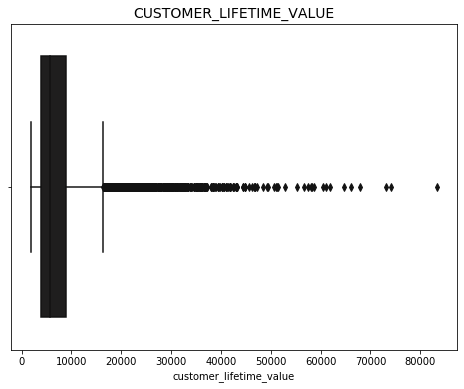

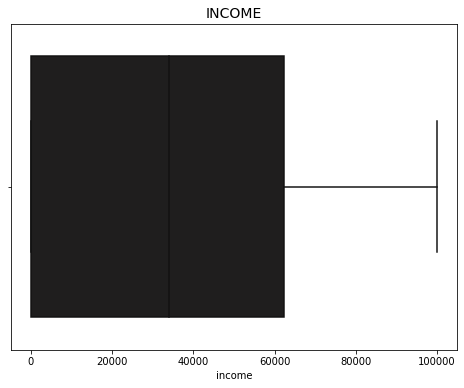

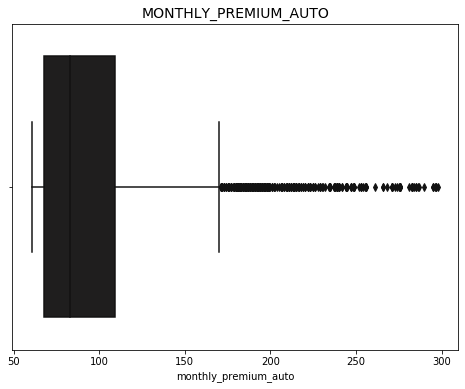

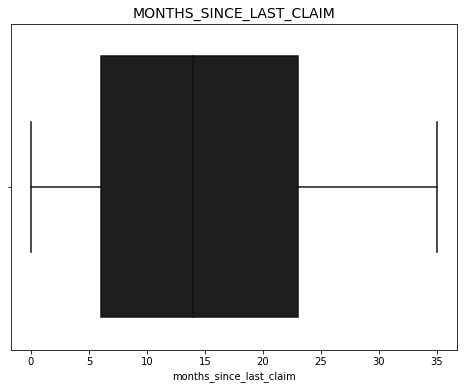

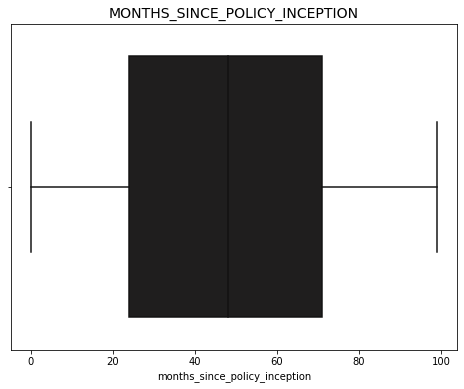

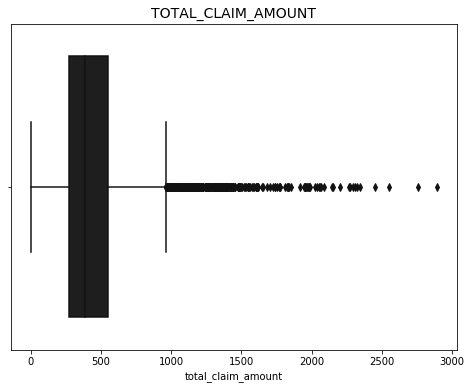

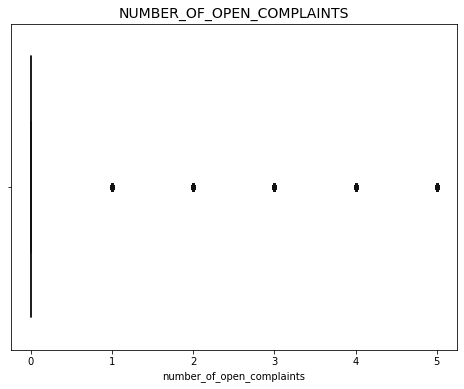

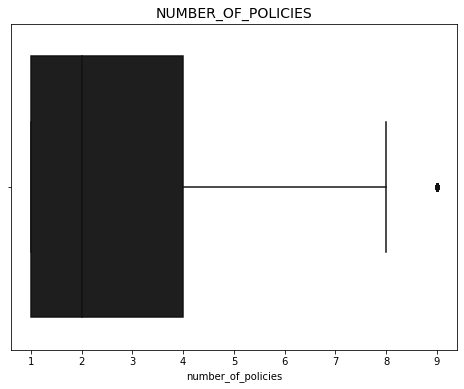

In [ ]:
def boxplots(dataframe):

    for column in dataframe.columns:
        fig = plt.figure(figsize = (8, 6))
        sns.boxplot(x = column, data = dataframe, palette = 'icefire')
        plt.title(f'{column.upper()}',  fontsize = 14)
        plt.show()

    return None

boxplots(continuous_discrete_df)

<h3> At least 3 of the discrete variables are very skewed. To be transformed. Regarding the continuous one, instead, income has a very large variabilty in his interquartile range, while customer lifetime and total claim amount have a relevant number of outliers and small variability talking about range and distribution. I found outliers in customer_lifetime_value and total_claim_amount. I wanna check how many they are.</h3>

In [ ]:
#Outliers Customer_lifetime_value

iqr = np.percentile(continuous_df['customer_lifetime_value'],75) - np.percentile(continuous_df['customer_lifetime_value'],25)
upper_limit = np.percentile(continuous_df['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)
extraordinary_points = continuous_df[continuous_df['customer_lifetime_value'] > upper_limit]
len(extraordinary_points)

16414.039911750002


817

<h2>I log transform the numerical features</h2>

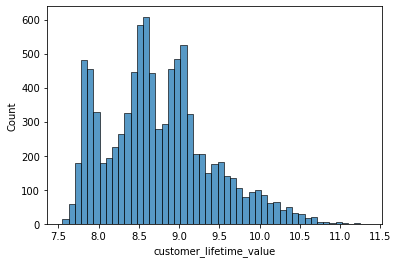

In [ ]:
def log_transform(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

continuous_df['customer_lifetime_value'] = continuous_df['customer_lifetime_value'].apply(log_transform)

sns.histplot(x='customer_lifetime_value', data=continuous_df)
plt.show()

---------------------------------------------------------------------------------------

<h1>LAB 3</h1>

<h2>PLOTTING THE CATEGORICALS  - COUNTPLOT</h2>

In [ ]:
for i in categoricals_df.columns:
    sns.countplot(categoricals_df[i])
    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


KeyboardInterrupt: 

<h2>TO SEE WHAT COLUMNS ARE REDUNDANT OR ARE NOT GIVING ANY INFORMATION, LET'S COMPARE THEM WITH THE TARGET</h2> 

In [ ]:
#Does that mean in their values or as entire columns/features?

SyntaxError: invalid syntax (<ipython-input-33-09b3574d2265>, line 8)

<h2>SPLITTING THE DATE COLUMN in  MONTH AND DAY</h2>

In [ ]:

def year_month_day(dataframe, date_column):

    year = dataframe[date_column].dt.year
    month = dataframe[date_column].dt.month
 

    dataframe['year'] = year
    dataframe['month'] = month
    

    dataframe['year'] = dataframe['year'].astype('object')
    dataframe['month'] = dataframe['month'].astype('object')

    return dataframe

customer_df = year_month_day(customer_df, 'effective_to_date')



<h2>PLOTTING IF THERE IS ANY RELEVANCE IN THE CATEGORICAL COLUMNS PER MONTH</h2>

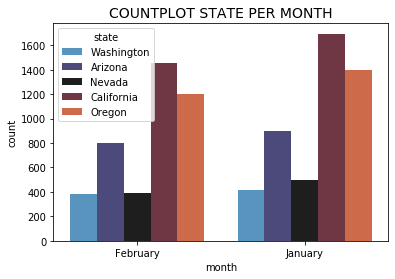

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x119898170> (for post_execute):


KeyboardInterrupt: 

In [52]:
customer_df['month'] = customer_df['month'].replace({1: 'January', 2: 'February'})

def countplot_cat_hue_month(dataframe, ignoring_columns, month):

    for column in dataframe.columns:
        if column not in ignoring_columns:
            fig = plt.figure(figsize = (6, 4))
            sns.countplot(x = month, data = dataframe, palette = 'icefire', hue = column, fill = True)
            plt.title(f'COUNTPLOT {column.upper()} PER MONTH', fontsize = 14)
            plt.show()

    return None

countplot_cat_hue_month(customer_df, ['customer', 'total_claim_amount', 'effective_to_date', 'month', 'day', 'year'], 'month')

In [112]:
def cleanemployment(x):
    if x == 'Medical Leave':
        return 'Other'
    elif x == 'Disabled':
        return 'Other'
    elif x == 'Retired':
        return 'Other'
    else:
        return x

cat['employmentstatus'] = cat['employmentstatus'].apply(cleanemployment)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


-----------------------------------------------------------------------------------

<h1>LAB 4</h1>

<h2>REMOVING OUTLIERS WITH FUNCTION</h2>

In [57]:

customer_df_total = pd.concat([categoricals_df, discrete_df, continuous_df], axis = 1)

# for column in numerical_columns:
    # iqr = np.percentile(customer_df_total[column], 75) - np.percentile(customer_df_total[column], 25)
    # upper_limit = np.percentile(customer_df_total[column], 75) + 1.5 * iqr
    # customer_df_total = customer_df_total[customer_df_total[column] < upper_limit]


    # I removed already big part of the outliers after doing the log transformation

<h2>CREATING A COPY OF THE DATAFRAME</h2>

In [113]:
customer_df_copy = customer_df_total.copy()

<h2>SCALING THE NUMERICAL DATA</h2>

In [114]:
customer_df_copy = customer_df_copy.drop(['customer'],axis=1)
y = customer_df_copy['total_claim_amount']
X = customer_df_copy.drop(['total_claim_amount'],axis=1)
continuous_df_copy = customer_df_copy[['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception']]
continuous_df_copy.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
0,2763.519279,56274,69,32,5
1,6979.535903,0,94,13,42
2,12887.431650,48767,108,18,38
3,7645.861827,0,106,18,65
4,2813.692575,43836,73,12,44


In [115]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(continuous_df_copy)
normalized = transformer.transform(continuous_df_copy)
normalized = pd.DataFrame(normalized,columns=continuous_df_copy.columns)
normalized.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
0,0.010629,0.562847,0.033755,0.914286,0.050505
1,0.062406,0.000000,0.139241,0.371429,0.424242
2,0.134960,0.487763,0.198312,0.514286,0.383838
3,0.070589,0.000000,0.189873,0.514286,0.656566
4,0.011245,0.438443,0.050633,0.342857,0.444444


<h2>ENCODING CATEGORICAL DATA USING ONE HOT ENCODING OR ORDINAL ENCODING</h2>

In [116]:
categorical_copy = categoricals_df.copy()
one_hot = categorical_copy[['state','marital_status','policy','renew_offer_type','sales_channel','vehicle_class']]
ordinal = categorical_copy[['coverage','employmentstatus','location_code','vehicle_size']]


encoder = OneHotEncoder().fit(one_hot)
encoded_onehot = encoder.transform(one_hot).toarray()

encoded_columns = list()
dropped_columns = list()

for columns in encoder.categories_:
    condition = True
    for column in columns.tolist():
        if condition:
            dropped_columns.append(column)
            encoded_columns.append(column)
            condition = False
        else:
            encoded_columns.append(column)

onehot_encoded = pd.DataFrame(data = encoded_onehot, columns=encoded_columns)
onehot_encoded = onehot_encoded.drop(columns = dropped_columns)

onehot_encoded.head()



,California,Nevada,Oregon,Washington,Married,Single,Corporate L2,Corporate L3,Personal L1,Personal L2,...,Offer3,Offer4,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
ordinal['coverage'] = ordinal['coverage'].map({'Basic' : 0, 'Extended' : 1, 'Premium' : 2})
ordinal['employmentstatus'] = ordinal['employmentstatus'].map({'Other' : 0, 'Unemployed' : 1, 'Employed' : 2})
ordinal['location_code'] = ordinal['location_code'].map({'Rural' : 0, 'Suburban' : 1, 'Urban' : 2})
ordinal['vehicle_size'] = ordinal['vehicle_size'].map({'Small' : 0, 'Medsize' : 1, 'Large' : 2})
ordinal.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,coverage,employmentstatus,location_code,vehicle_size
0,0,2,1,1
1,1,1,1,1
2,2,2,1,1
3,0,1,1,1
4,0,2,0,1


---------------------------------------------------------

<h1>LAB COMPARING REGRESSION MODELS</h1>

In [118]:
X = pd.concat([onehot_encoded, normalized, ordinal], axis = 1)
X
y = customer_df_copy['total_claim_amount']

<h2>PERFORMING THE TRAIN TEST SPLIT</h2>

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


<h2>CREATING AND TRAINING A SIMPLE LINEAR REGRESSION MODEL</h2>

In [122]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model= lm.fit(X_train,y_train)

score = lm.score(X_test, y_test)
score



0.5969517627304628

<h2>TRAINING KNEIGHBORS AND MLP REGRESSORS WITH FUNCTION/h2>

In [123]:
def model_training(models,X_train,y_train):
    models_train = []
    for model in models:
        model.fit(X_train,y_train)
        models_train.append(model)
    return models_train
        
        
trained = model_training([MLPRegressor(max_iter=1000),linear_model.LinearRegression(),KNeighborsRegressor()],X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<h2>KNEIGHBORS AND MLP REGRESSORS</h2>

In [124]:

score_mlp = trained[0].score(X_test, y_test)
score_linear = trained[1].score(X_test, y_test)
score_KNN = trained[2].score(X_test, y_test)

print('MLPRegressor Score:',score_mlp)
print('LinearRegressor Score:',score_linear)
print('KNN Score:',score_KNN)

MLPRegressor Score: 0.8058107875971567
LinearRegressor Score: 0.5969517627304628
KNN Score: 0.5821604468734736



#The MLP regressor has the highest score for prediction. The MLP regressor is a neural network which learns the patterns in the data and can see relationships in a different way and with different emphasis comparing to other models, but this model can overfit the training dataset,: this means that he might learn the training dataset too well, performing well on the training dataset but not perfoming well on a hold out sample.
